# Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

# Data Loading

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample:\n{train_data[0]}")
print(f"Training labels:\n{train_labels[0]}")
print(f"Testing sample:\n{test_data[0]}")
print(f"Testing labels:\n{test_labels[0]}")
print(f"Training sample shape:\n{train_data.shape}")
print(f"Training labels shape:\n{train_labels.shape}")
print(f"Testing sample shape:\n{test_data.shape}")
print(f"Testing labels shape:\n{test_labels.shape}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

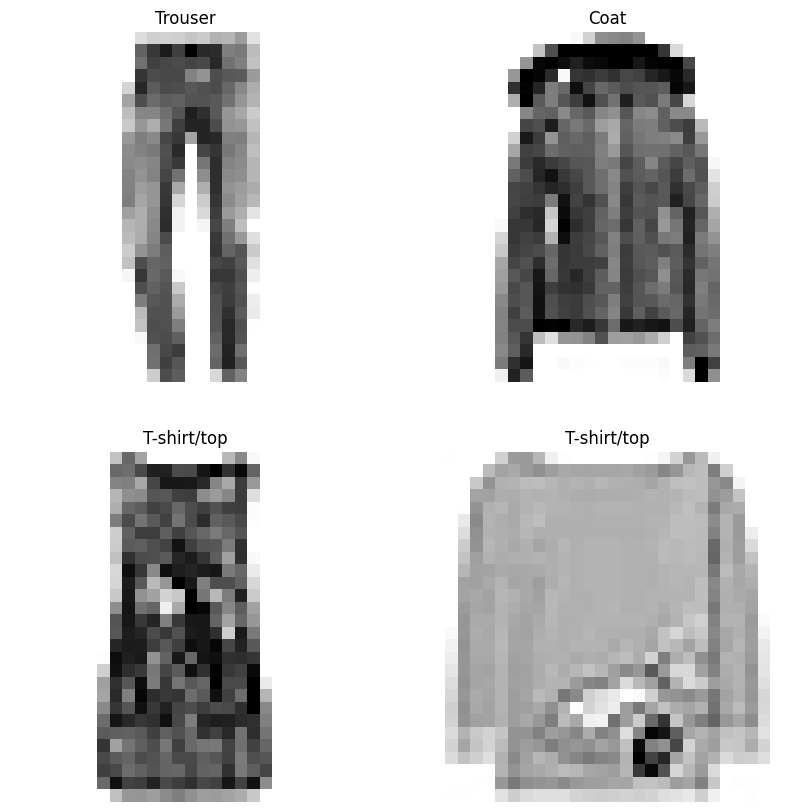

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import random
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_num = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_num], cmap=plt.cm.binary)
    plt.title(classes[train_labels[rand_num]])
    plt.axis(False)

# Modeling

In [ ]:
tf.random.set_seed(42)

fmnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fmnist_model.compile(loss='categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

history_1 = fmnist_model.fit(train_data,
                           tf.one_hot(train_labels, depth=10),
                           epochs=10,
                           validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6709 - loss: 10.6143 - val_accuracy: 0.7373 - val_loss: 0.7771
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7523 - loss: 0.7225 - val_accuracy: 0.7741 - val_loss: 0.6853
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7904 - loss: 0.6039 - val_accuracy: 0.8044 - val_loss: 0.5726
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8107 - loss: 0.5452 - val_accuracy: 0.8138 - val_loss: 0.5773
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8234 - loss: 0.5166 - val_accuracy: 0.8221 - val_loss: 0.5575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8341 - loss: 0.4938 - val_accuracy: 0.8247 - val_loss: 0.5203
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8356 - loss: 0.4843 - val_accuracy: 0.8289 - val_loss: 0.5281
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8408 - loss: 0.4

In [ ]:
tf.random.set_seed(42)

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

fmnist_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fmnist_model_2.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

history_2 = fmnist_model_2.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7812 - loss: 0.6321 - val_accuracy: 0.8443 - val_loss: 0.4276
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8627 - loss: 0.3867 - val_accuracy: 0.8600 - val_loss: 0.3822
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8763 - loss: 0.3424 - val_accuracy: 0.8678 - val_loss: 0.3663
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8868 - loss: 0.3150 - val_accuracy: 0.8711 - val_loss: 0.3578
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8903 - loss: 0.2959 - val_accuracy: 0.8701 - val_loss: 0.3544
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8963 - loss: 0.2802 - val_accuracy: 0.8726 - val_loss: 0.3545
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9009 - loss: 0.2678 - val_accuracy: 0.8694 - val_loss: 0.3632
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9046 - loss: 0.2567

<Axes: title={'center': 'Normalized'}>

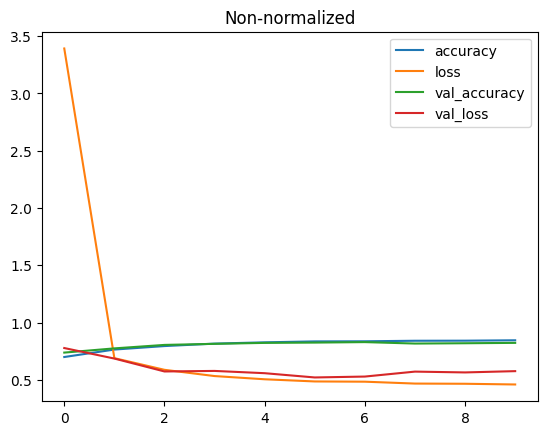

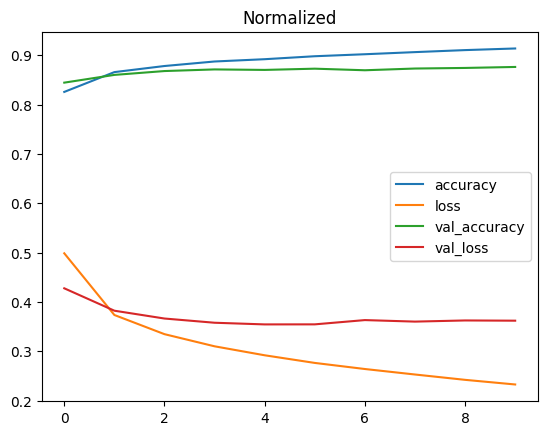

In [ ]:
pd.DataFrame(history_1.history).plot(title='Non-normalized')
pd.DataFrame(history_2.history).plot(title='Normalized')

In [ ]:
tf.random.set_seed(42)

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

fmnist_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fmnist_model_3.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))

history_3 = fmnist_model_3.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels),
                           callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7807 - loss: 0.6324 - val_accuracy: 0.8456 - val_loss: 0.4242 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8592 - loss: 0.3907 - val_accuracy: 0.8575 - val_loss: 0.3896 - learning_rate: 0.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8726 - loss: 0.3489 - val_accuracy: 0.8598 - val_loss: 0.3814 - learning_rate: 0.0013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8793 - loss: 0.3250 - val_accuracy: 0.8588 - val_loss: 0.3778 - learning_rate: 0.0014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8867 - loss: 0.3095 - val_accuracy: 0.8647 - val_loss: 0.3707 - learning_rate: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8876 - loss: 0.2992 - val_accuracy: 0.8664 - val_loss: 0.3711 - learning_rate: 0.0018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8908

<Axes: >

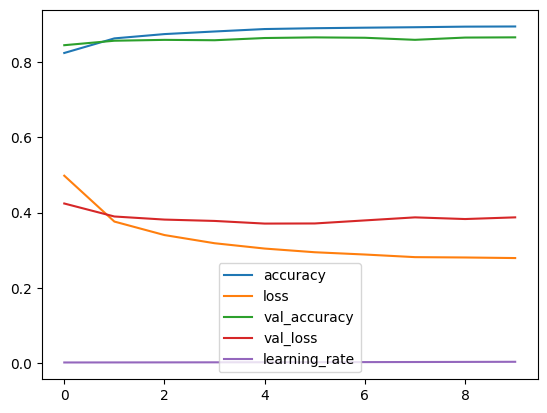

In [ ]:
pd.DataFrame(history_3.history).plot()

Text(0.5, 1.0, 'Learning Rate vs. Loss')

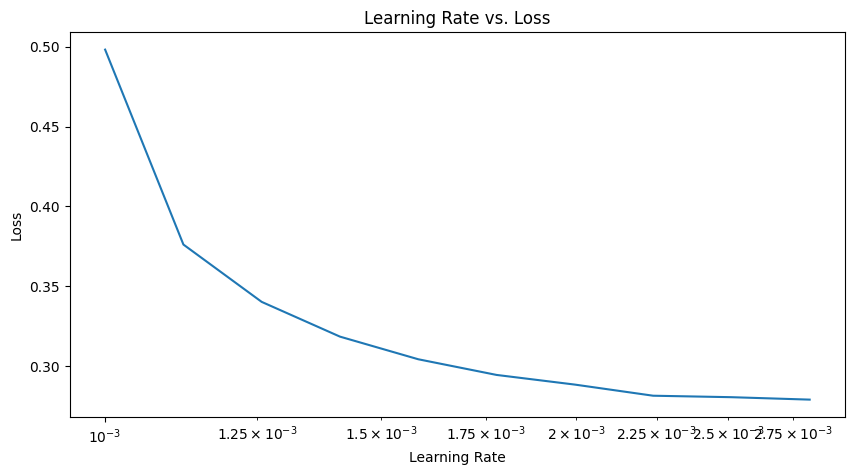

In [ ]:
plt.figure(figsize=(10,5))
lrs = 1e-3 * (10**(tf.range(10) / 20))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')

In [ ]:
tf.random.set_seed(42)

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

fmnist_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fmnist_model_4.compile(loss='sparse_categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0018),
                     metrics=['accuracy'])

history_4 = fmnist_model_4.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7845 - loss: 0.6140 - val_accuracy: 0.8448 - val_loss: 0.4172
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8619 - loss: 0.3811 - val_accuracy: 0.8572 - val_loss: 0.3911
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8745 - loss: 0.3403 - val_accuracy: 0.8658 - val_loss: 0.3746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8830 - loss: 0.3173 - val_accuracy: 0.8690 - val_loss: 0.3728
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8887 - loss: 0.3001 - val_accuracy: 0.8685 - val_loss: 0.3705
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8937 - loss: 0.2848 - val_accuracy: 0.8762 - val_loss: 0.3620
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8997 - loss: 0.2706 - val_accuracy: 0.8737 - val_loss: 0.3626
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9035 - loss: 0.2591 -

# Evaluation

In [ ]:
y_probs = fmnist_model_4.predict(test_data_norm)

y_pred = y_probs.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
cm

array([[867,   1,  22,  26,   6,   0,  74,   0,   4,   0],
       [  2, 976,   2,  16,   3,   0,   1,   0,   0,   0],
       [ 14,   0, 843,  18,  78,   0,  45,   0,   2,   0],
       [ 16,  17,  12, 886,  42,   1,  24,   0,   2,   0],
       [  1,   0, 142,  24, 805,   0,  24,   0,   4,   0],
       [  0,   0,   0,   0,   0, 931,   0,  32,   1,  36],
       [144,   0, 131,  36, 126,   0, 558,   0,   5,   0],
       [  0,   0,   0,   0,   0,   8,   0, 977,   0,  15],
       [  5,   0,   6,   6,   5,   3,   4,   4, 967,   0],
       [  0,   0,   0,   0,   0,   2,   1,  65,   0, 932]])

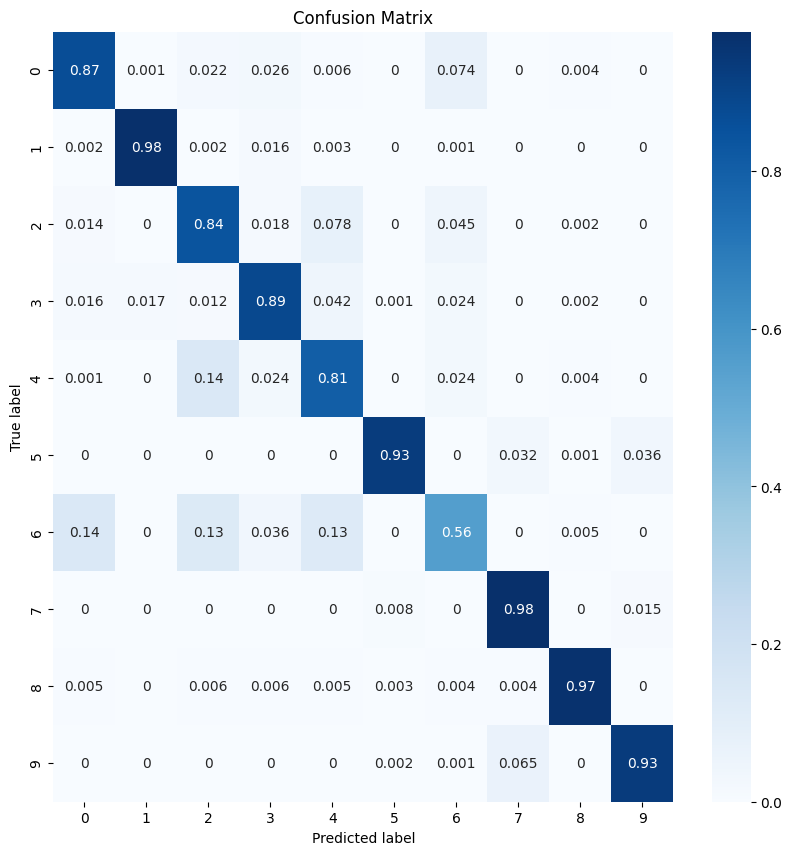

In [ ]:
figsize = (10,10)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmap = 'Blues'

plt.figure(figsize=figsize)
ax = sns.heatmap(cm_norm, annot=True, cmap=cmap)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
def plot_random_image(model, data, labels, classes=classes):
  rand_num = random.choice(range(len(data)))
  plt.imshow(data[rand_num], cmap=plt.cm.binary)

  image = data[rand_num]
  probs = model.predict(np.expand_dims(image, axis=0))
  pred = probs.argmax(axis=1)

  if pred == labels[rand_num]:
    color = 'green'
  else:
    color = 'red'

  plt.title(f"Actual: {classes[train_labels[rand_num]]}, Predicted: {classes[pred[0]]} ({tf.reduce_max(probs)*100:2.0f}%)", c=color)
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


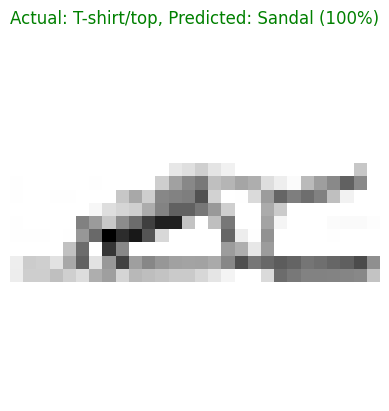

In [ ]:
plot_random_image(fmnist_model_4, test_data_norm, test_labels)

# Model Saving

In [ ]:
fmnist_model_4.save('fmnist_model.h5')

In [ ]:
fmnist_model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)